<a href="https://colab.research.google.com/github/IkhlasAhmad1998/DeepLearning_Assignments/blob/main/Flowers_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
cd /content/drive/MyDrive/DeepLearning/flowers

/content/drive/MyDrive/DeepLearning/flowers


In [7]:
import os
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow import keras
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
from pathlib import Path
import pandas as pd

In [8]:
categories = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [11]:
# Loading Data And Defining Features And Labels
directory = Path("/content/drive/MyDrive/DeepLearning/flowers")

flowers = []
features = []
labels = []

# Iterating Over Directory To Extract Sub Directories
for dir in directory.iterdir():
  flowers.append(dir.name)
  print(dir.name)
# Iterating Over Sub Directories To Extract Lables
  i = 0
  for imgpath in dir.iterdir():
    if imgpath.name.endswith("jpg"):
      labels.append(dir.name)
      imgarr = cv2.imread(str(imgpath))
      imgarr = cv2.cvtColor(imgarr, cv2.COLOR_BGR2GRAY)
      imgarr = cv2.resize(imgarr, (150,150))
      features.append(imgarr)
      i+=1
      print(i, end=' ')

daisy
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 27

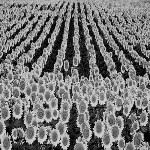

In [12]:
from google.colab.patches import cv2_imshow
cv2_imshow(features[3000])

In [13]:
features = np.array(features, dtype=np.float32)

In [14]:
labels = np.array(labels)

In [15]:
features.shape

(4323, 150, 150)

In [16]:
labels.shape

(4323,)

In [17]:
features = features.reshape((4323, 150*150))
features = features.astype('float32') / 255

In [18]:
features[0]

array([0.53333336, 0.5647059 , 0.5764706 , ..., 0.5058824 , 0.5019608 ,
       0.5019608 ], dtype=float32)

In [19]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

labels = labelencoder.fit_transform(labels)

In [20]:
from sklearn.model_selection import train_test_split
(train_data, test_data, train_labels, test_labels) = train_test_split(features, labels, test_size=0.3)

In [21]:
train_data.shape

(3026, 22500)

In [22]:
train_labels.shape

(3026,)

In [23]:
train_labels[0:5]

array([1, 2, 1, 3, 4])

In [24]:
test_data.shape

(1297, 22500)

In [25]:
test_labels.shape

(1297,)

In [26]:
train_data.shape

(3026, 22500)

In [27]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [28]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(5, activation='softmax'))

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(train_data, train_labels, epochs=140, batch_size=32, validation_split=0.2)

Epoch 1/140
76/76 [==============================] - 4s 9ms/step - loss: 14.8916 - accuracy: 0.2203 - val_loss: 2.2202 - val_accuracy: 0.2195
Epoch 2/140
76/76 [==============================] - 0s 6ms/step - loss: 1.9473 - accuracy: 0.3094 - val_loss: 1.8096 - val_accuracy: 0.2541
Epoch 3/140
76/76 [==============================] - 0s 6ms/step - loss: 1.7702 - accuracy: 0.3402 - val_loss: 2.1789 - val_accuracy: 0.3053
Epoch 4/140
76/76 [==============================] - 0s 6ms/step - loss: 1.8668 - accuracy: 0.3652 - val_loss: 1.8050 - val_accuracy: 0.2673
Epoch 5/140
76/76 [==============================] - 0s 6ms/step - loss: 1.4871 - accuracy: 0.4051 - val_loss: 2.0042 - val_accuracy: 0.2739
Epoch 6/140
76/76 [==============================] - 0s 6ms/step - loss: 1.5812 - accuracy: 0.3753 - val_loss: 1.7836 - val_accuracy: 0.3152
Epoch 7/140
76/76 [==============================] - 0s 6ms/step - loss: 1.5327 - accuracy: 0.4244 - val_loss: 1.8571 - val_accuracy: 0.2409
Epoch 8/140


In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

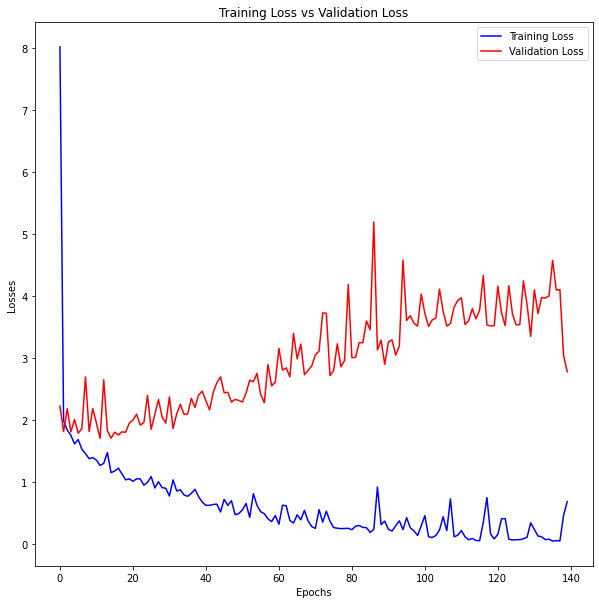

In [35]:
t_loss = history.history['loss']
v_loss = history.history['val_loss']
epochs = range(140)
fig = plt.figure(figsize=(10,10))
plt.plot(epochs, t_loss, 'b', label='Training Loss')
plt.plot(epochs, v_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title("Training Loss vs Validation Loss")
plt.legend()
plt.show()

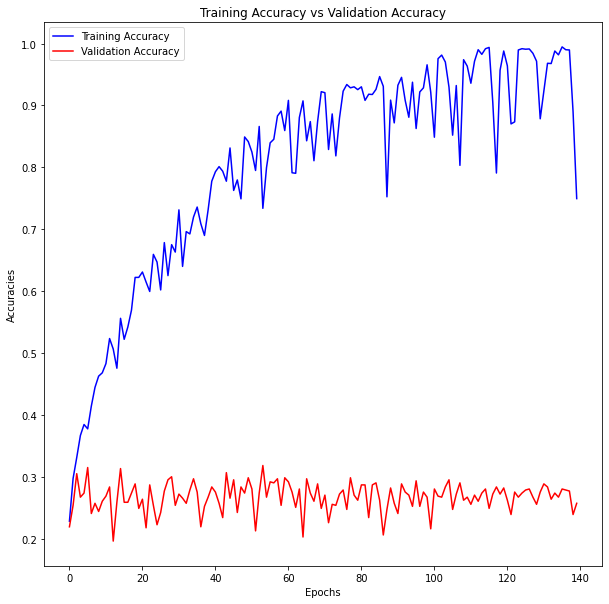

In [38]:
t_acc = history.history['accuracy']
v_acc = history.history['val_accuracy']
epochs = range(140)
fig = plt.figure(figsize=(10,10))
plt.plot(epochs, t_acc, 'b', label='Training Accuracy')
plt.plot(epochs, v_acc, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend()
plt.show()

In [39]:
model.evaluate(test_data, test_labels)

41/41 [==============================] - 0s 3ms/step - loss: 2.6637 - accuracy: 0.3146


[2.6636836528778076, 0.3145720958709717]